In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/jejejery/if5153-tubes/main/data/data_promo_labelled.csv"
df = pd.read_csv(url)
df.head()

,full_text,label
0,Serius kalian mesti transaksi pake OVO PayLate...,6
1,KODE PROMO TERBARU GOJEK GAJIAN COBAINGOJEK GS...,5
2,SUPER BIG MATCH ALERT! Pertandingan yang kita...,6
3,DISKON MAKANAN &amp; MINUMAN PROMO GAJIAN AKHI...,0
4,KUMPULAN PROMO GOJEK BIAR KAMU MAKIN HEMAT! ht...,5


In [ ]:
sentences_only = np.array(df['full_text'])

In [ ]:
!pip install transformers==4.45.2 sentence-transformers==3.1.1
!pip install datasets

In [ ]:
from sentence_transformers import SentenceTransformer, util
#load model
model = SentenceTransformer('firqaaa/indo-sentence-bert-base')


In [ ]:
embeddings = model.encode(sentences_only, convert_to_tensor=True)
embeddings.shape

torch.Size([356, 768])

Measure optimal k: 100%|██████████| 17/17 [00:00<00:00, 68.34it/s]


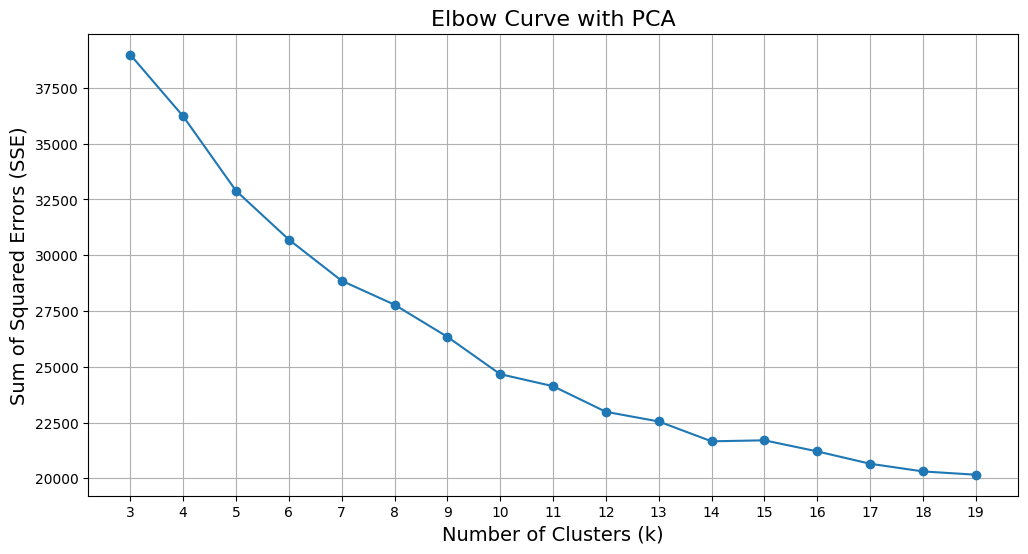

In [ ]:

# see if the PCA could lead into a better clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

# Reduce dimensions using PCA
pca = PCA(n_components=15)
new_embeddings = model.encode(np.array(sentences_only), convert_to_tensor=True)
pca_embeddings = pca.fit_transform(new_embeddings.cpu().numpy())

# Find the right elbow
sse = []
for k in tqdm(range(3, 20), desc="Measure optimal k"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_embeddings)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(range(3, 20), sse, marker='o')
plt.xticks(range(3, 20))
plt.title('Elbow Curve with PCA', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
plt.grid()
plt.show()


In conclusion, we could try 7 as an elbow

In [ ]:
#cluster labels
_cluster_labels = {
    0 : 'food',
    1  : 'beauty',
    2 : 'entertaiment',
    3 : 'fashion',
    4 : 'technology',
    5 : 'travel & leissure',
    6 : 'others'
}

In [ ]:
# k-means for pca_embedding for k = 7
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(pca_embeddings)

# get array of cluster
cluster_array = kmeans.labels_
# convert each cluster, for example: 0 -> 'A', 1 -> 'B', etc.
cluster_array = np.array([chr(65 + i) for i in cluster_array])
cluster_array

array(['F', 'A', 'E', 'D', 'A', 'D', 'C', 'C', 'C', 'F', 'A', 'E', 'F',
       'A', 'E', 'A', 'A', 'A', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'D',
       'F', 'A', 'F', 'E', 'A', 'A', 'A', 'F', 'A', 'A', 'F', 'E', 'F',
       'E', 'D', 'A', 'D', 'A', 'E', 'B', 'D', 'A', 'E', 'D', 'C', 'D',
       'E', 'C', 'C', 'F', 'E', 'D', 'C', 'G', 'C', 'G', 'A', 'E', 'E',
       'D', 'F', 'E', 'F', 'F', 'D', 'F', 'E', 'A', 'G', 'E', 'A', 'A',
       'D', 'D', 'D', 'G', 'F', 'D', 'E', 'D', 'D', 'C', 'C', 'D', 'C',
       'G', 'A', 'E', 'E', 'E', 'E', 'D', 'C', 'E', 'G', 'E', 'D', 'D',
       'G', 'D', 'G', 'B', 'E', 'E', 'G', 'E', 'G', 'A', 'D', 'G', 'D',
       'E', 'A', 'A', 'E', 'E', 'E', 'G', 'C', 'D', 'D', 'E', 'B', 'B',
       'B', 'B', 'B', 'D', 'G', 'G', 'A', 'A', 'C', 'D', 'E', 'E', 'D',
       'E', 'G', 'B', 'E', 'G', 'A', 'G', 'C', 'C', 'A', 'A', 'A', 'D',
       'D', 'G', 'D', 'F', 'D', 'A', 'A', 'A', 'A', 'E', 'F', 'B', 'B',
       'G', 'B', 'B', 'F', 'F', 'F', 'F', 'B', 'C', 'F', 'G', 'B

In [ ]:
df['label_text'] = [_cluster_labels[k] for k in df['label']]

In [ ]:
df['clustering_results'] = cluster_array
df.head()

,full_text,label,label_text,clustering_results
0,Serius kalian mesti transaksi pake OVO PayLate...,6,others,F
1,KODE PROMO TERBARU GOJEK GAJIAN COBAINGOJEK GS...,5,travel & leissure,A
2,SUPER BIG MATCH ALERT! Pertandingan yang kita...,6,others,E
3,DISKON MAKANAN &amp; MINUMAN PROMO GAJIAN AKHI...,0,food,D
4,KUMPULAN PROMO GOJEK BIAR KAMU MAKIN HEMAT! ht...,5,travel & leissure,A


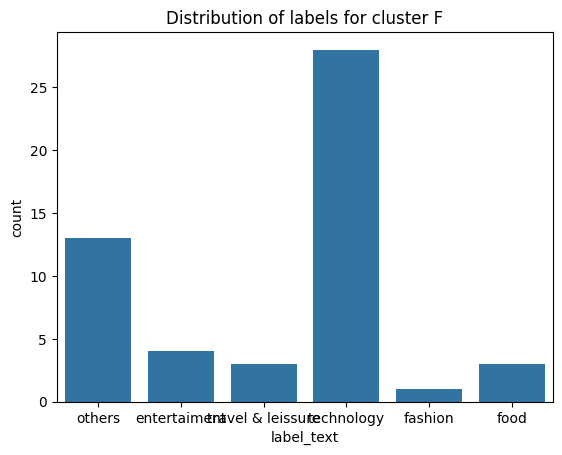

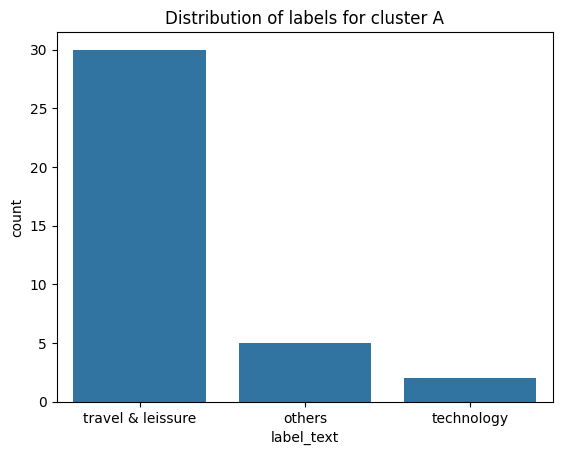

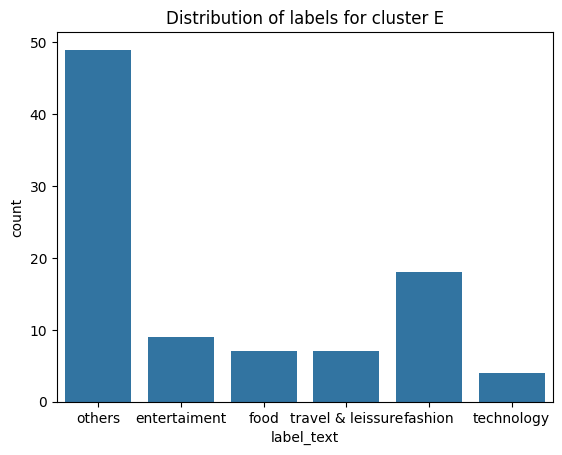

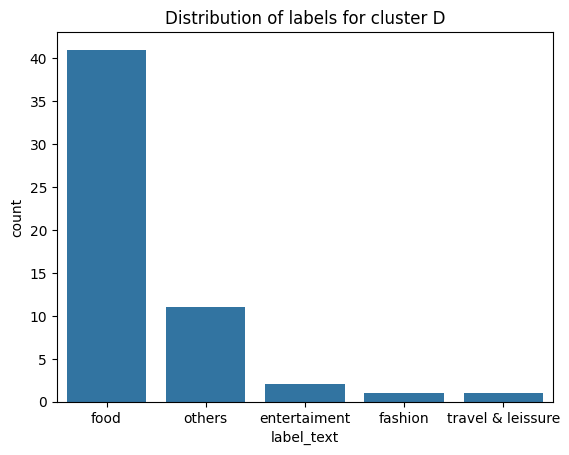

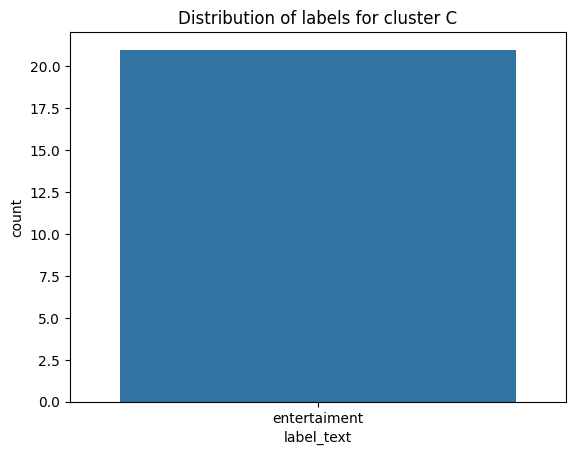

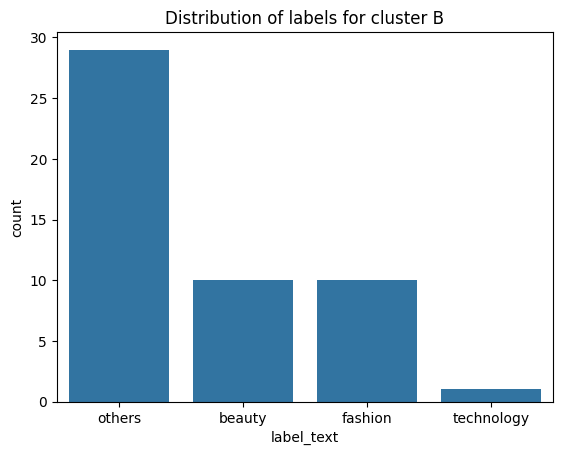

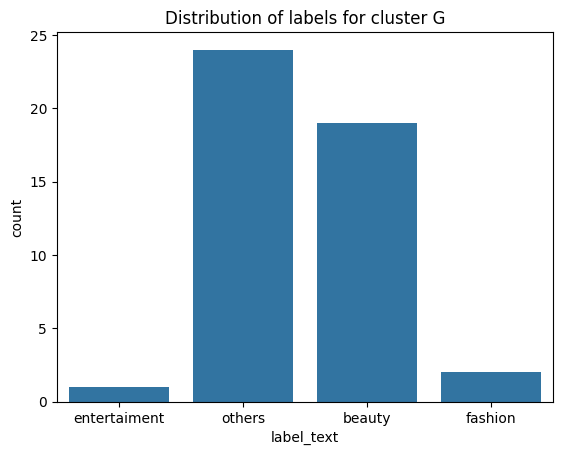

In [ ]:
#for every unique cluster, plot the distribution of labels
for cluster in df['clustering_results'].unique():
    sns.countplot(x='label_text', data=df[df['clustering_results'] == cluster])
    plt.title(f'Distribution of labels for cluster {cluster}')
    plt.show()



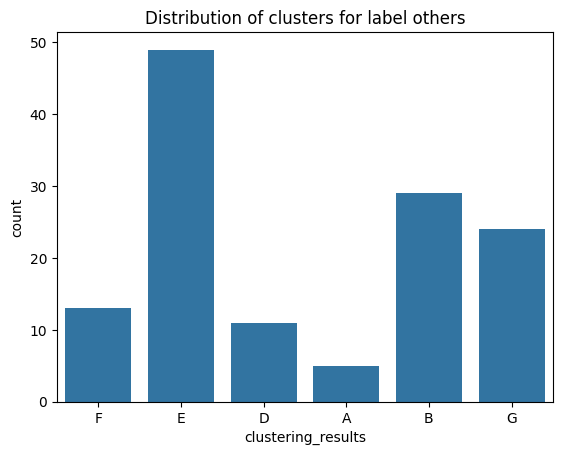

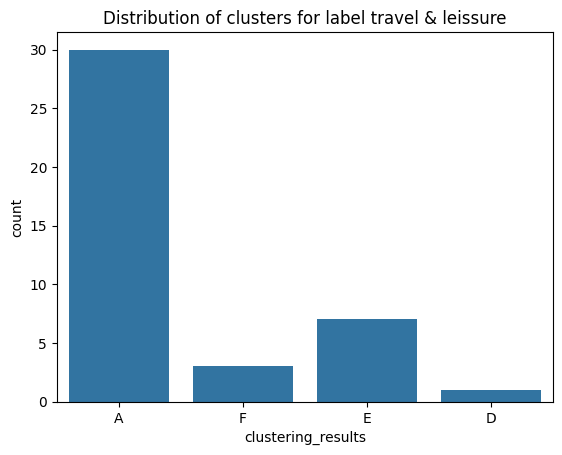

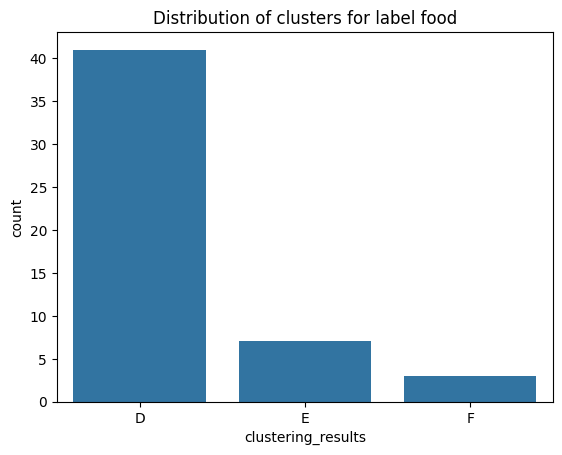

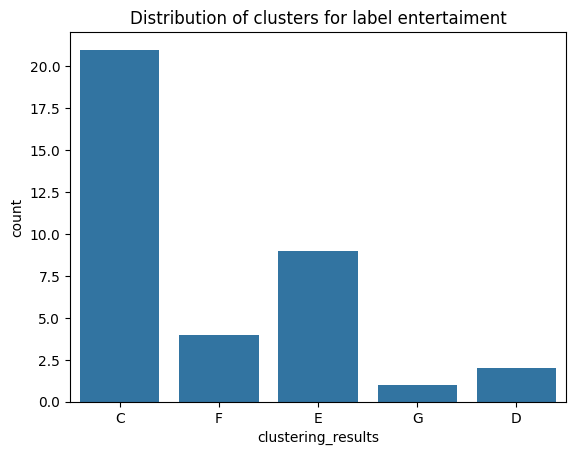

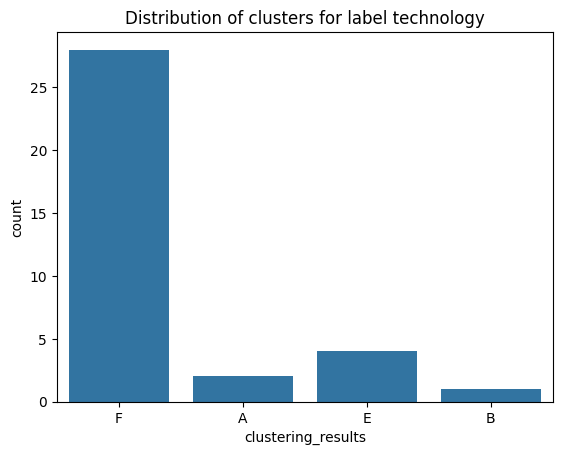

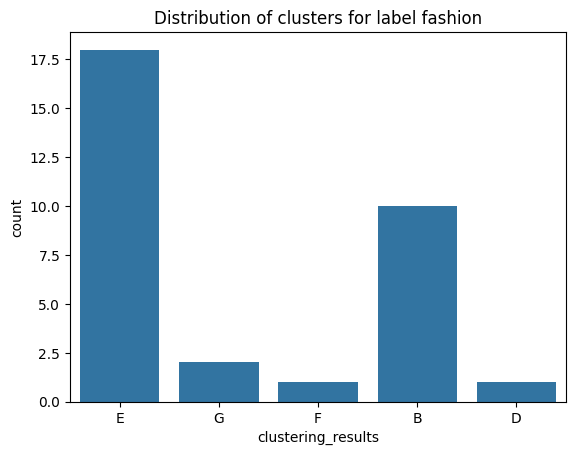

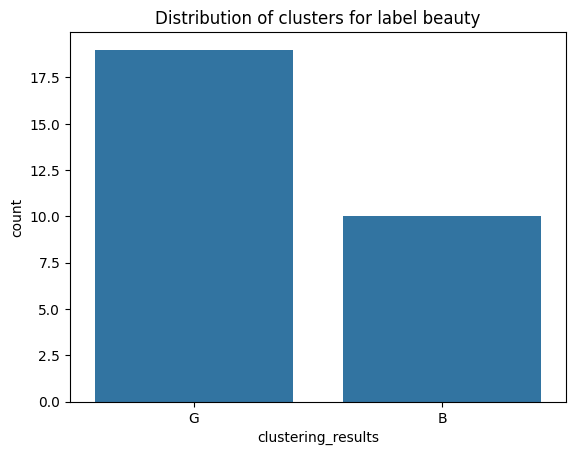

In [ ]:
# for every unique labels, plot each coresponding cluster
for label in df['label_text'].unique():
    sns.countplot(x='clustering_results', data=df[df['label_text'] == label])
    plt.title(f'Distribution of clusters for label {label}')
    plt.show()

## Fine Tune the sentences transformers

In [ ]:
the_data = df[['full_text','label']]
#perform train-test split
#import train test split

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(the_data, test_size=0.7, stratify=the_data['label'], random_state=42)


In [ ]:
train_data['label'].value_counts()

,count
label,
6,39
0,15
5,12
2,11
3,10
4,10
1,9


In [ ]:
from sentence_transformers import InputExample

# Create InputExample pairs
train_examples = []
# change train_data into tuple (text, label)
_train_data = list(zip(train_data['full_text'], train_data['label']))

for i, (text1, label1) in enumerate(_train_data):
    for j, (text2, label2) in enumerate(_train_data):
        if i < j:  # Avoid duplicate pairs
            score = 1.0 if label1 == label2 else 0.0
            train_examples.append(InputExample(texts=[text1, text2], label=score))

len(train_examples)

5565

In [ ]:
from sentence_transformers import losses
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


train_loss = losses.CosineSimilarityLoss(model)
# batch size
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

# training parameters
num_epochs = 2
warmup_steps = int(len(train_dataloader) * num_epochs * 0.1)  # 10% of training as warmup

# Fine-tune the model
model.fit(
    train_objectives=[(train_dataloader, train_loss)],
    epochs=num_epochs,
    warmup_steps=warmup_steps,
    output_path="fine_tuned_sentence_transformer"
)

Step,Training Loss
500,0.024400


Computing widget examples:   0%|          | 0/1 [00:00<?, ?example/s]

Measure optimal k: 100%|██████████| 12/12 [00:00<00:00, 83.13it/s]


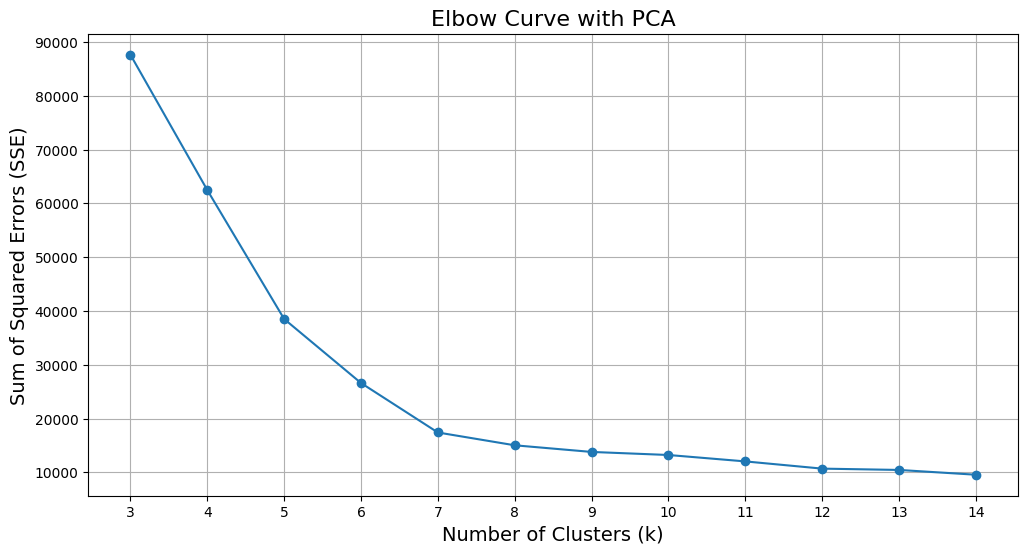

In [ ]:
# see if the PCA could lead into a better clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from tqdm import tqdm

# Reduce dimensions using PCA
pca = PCA(n_components=15)
new_embeddings = model.encode(np.array(test_data['full_text']), convert_to_tensor=True)
pca_embeddings = pca.fit_transform(new_embeddings.cpu().numpy())

# Find the right elbow
sse = []
for k in tqdm(range(3, 15), desc="Measure optimal k"):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_embeddings)
    sse.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(12, 6))
plt.plot(range(3, 15), sse, marker='o')
plt.xticks(range(3, 15))
plt.title('Elbow Curve with PCA', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
plt.grid()
plt.show()


In [ ]:
# k-means for pca_embedding for k = 7
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(pca_embeddings)

# get array of cluster
cluster_array = kmeans.labels_
# convert each cluster, for example: 0 -> 'A', 1 -> 'B', etc.
cluster_array = np.array([chr(65 + i) for i in cluster_array])
cluster_array

array(['B', 'F', 'B', 'E', 'A', 'E', 'A', 'C', 'D', 'E', 'E', 'E', 'C',
       'C', 'C', 'D', 'E', 'E', 'E', 'F', 'E', 'B', 'A', 'E', 'D', 'G',
       'F', 'G', 'B', 'E', 'D', 'G', 'E', 'E', 'D', 'C', 'C', 'A', 'B',
       'C', 'F', 'A', 'D', 'A', 'E', 'E', 'E', 'C', 'D', 'E', 'E', 'D',
       'B', 'E', 'F', 'G', 'E', 'C', 'B', 'D', 'E', 'B', 'G', 'B', 'E',
       'D', 'E', 'A', 'E', 'D', 'E', 'A', 'C', 'G', 'B', 'E', 'D', 'B',
       'E', 'E', 'G', 'B', 'F', 'E', 'E', 'E', 'G', 'C', 'E', 'E', 'B',
       'D', 'G', 'A', 'G', 'G', 'E', 'C', 'D', 'E', 'A', 'E', 'C', 'E',
       'D', 'E', 'E', 'A', 'E', 'D', 'E', 'D', 'F', 'E', 'D', 'F', 'F',
       'E', 'E', 'E', 'E', 'G', 'C', 'E', 'E', 'C', 'D', 'E', 'C', 'E',
       'F', 'F', 'E', 'E', 'E', 'D', 'E', 'B', 'E', 'D', 'E', 'E', 'E',
       'E', 'B', 'C', 'D', 'D', 'E', 'E', 'E', 'D', 'F', 'E', 'G', 'C',
       'D', 'E', 'D', 'A', 'F', 'E', 'E', 'E', 'D', 'C', 'F', 'C', 'B',
       'C', 'B', 'C', 'E', 'F', 'E', 'E', 'C', 'A', 'D', 'A', 'B

In [ ]:
#rest index for test_data
test_data = test_data.reset_index(drop=True)

test_data['label_text'] = [_cluster_labels[k] for k in test_data['label']]
test_data['clustering_results'] = cluster_array
test_data.head()

,full_text,label,label_text,clustering_results
0,READY Promo Nonton Bioskop B1G1 XXI CGV Cinepo...,2,entertaiment,B
1,Beli paket internet &amp; pulsa Telkomsel bisa...,4,technology,F
2,WTS PROMO NONTON DI BIOSKOP CGV FREE POPCORN O...,2,entertaiment,B
3,TOMORO 9K Aja nih Voucher Diskon Tomoro jadi 9...,0,food,E
4,PROMO CUCI SEPATU ️ DROP 3 ITEM 50K DROP 5 ITE...,3,fashion,A


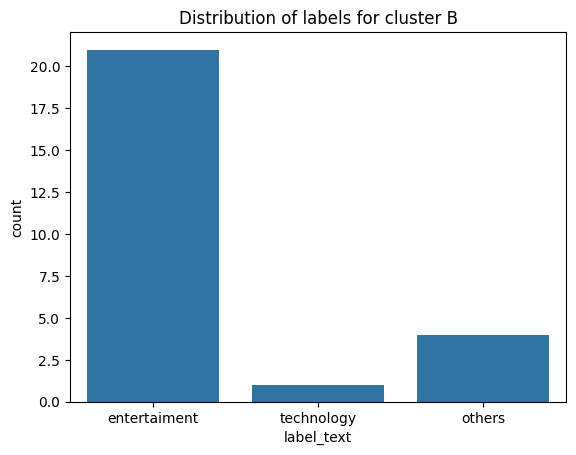

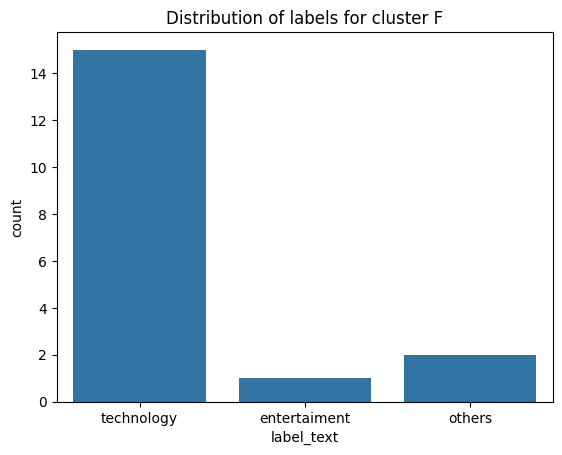

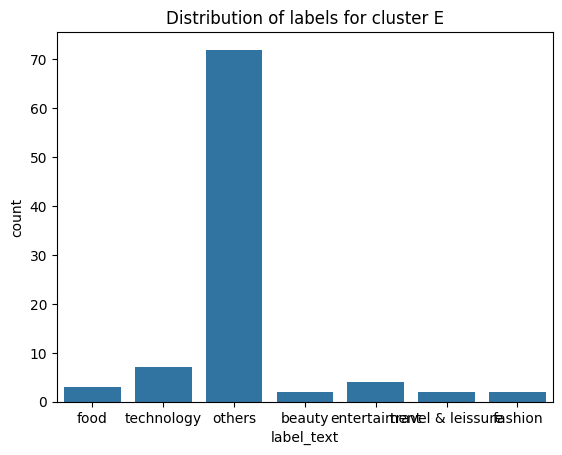

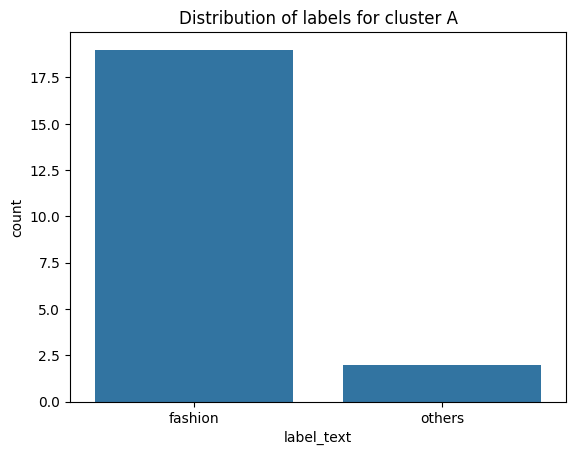

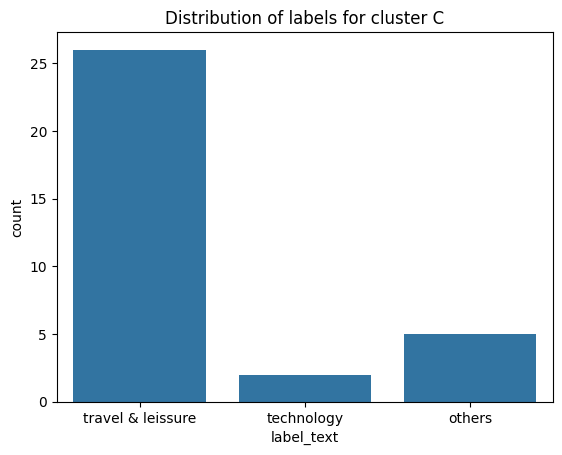

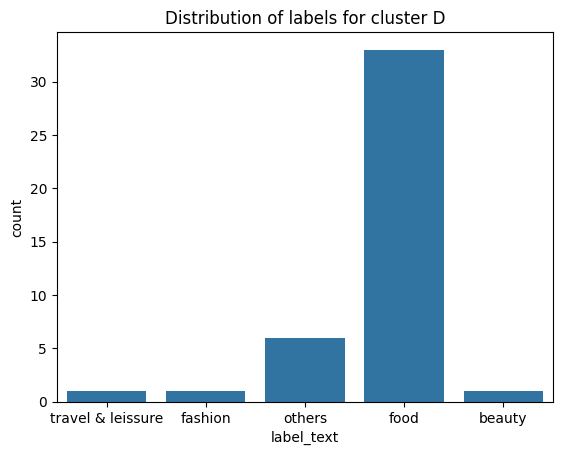

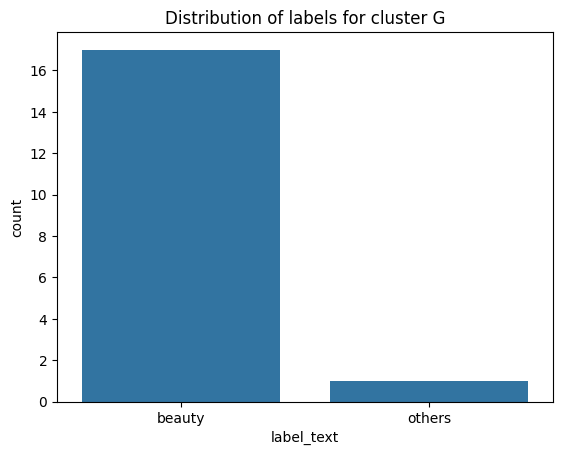

In [ ]:
#for every unique cluster, plot the distribution of labels
for cluster in test_data['clustering_results'].unique():
    sns.countplot(x='label_text', data=test_data[test_data['clustering_results'] == cluster])
    plt.title(f'Distribution of labels for cluster {cluster}')
    plt.show()


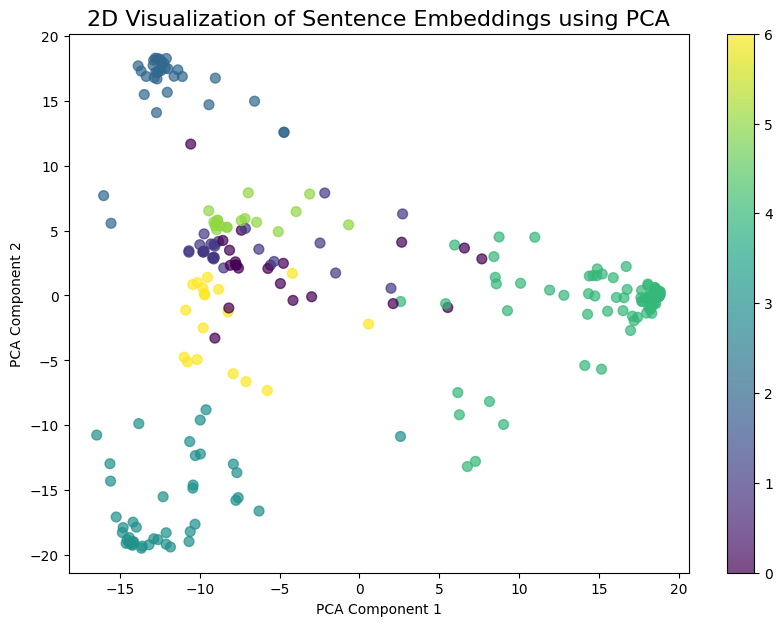

In [ ]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(new_embeddings.cpu().numpy())

plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('2D Visualization of Sentence Embeddings using PCA', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()  # Show color bar to represent clusters
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path =  "/content/drive/MyDrive/TUGAS BESAR NLP/MODEL/Promo-Clustering/"
model.save(path)